In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Sleep_Health_Lifestyle_preprocessed.csv')

# Примеры фильтрации:
high_sleep_quality = df[df['Quality of Sleep'] >= 8]  # Люди с высоким качеством сна
high_stress = df[df['Stress Level'] > 6]             # Группа с высоким стрессом
doctors = df[df['Occupation_Code'] == 1]             # Только врачи (если 1 = 'Doctor')

In [6]:
print("\n2. Информация о данных:")
display(df.info())


2. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Person ID                374 non-null    int64
 1   Age                      374 non-null    int64
 2   Sleep Duration           374 non-null    int64
 3   Quality of Sleep         374 non-null    int64
 4   Physical Activity Level  374 non-null    int64
 5   Stress Level             374 non-null    int64
 6   Heart Rate               374 non-null    int64
 7   Daily Steps              374 non-null    int64
 8   Systolic_BP              374 non-null    int64
 9   Diastolic_BP             374 non-null    int64
 10  Gender_Code              374 non-null    int64
 11  BMI_Code                 374 non-null    int64
 12  Occupation_Code          374 non-null    int64
 13  Has_Sleep_Disorder       374 non-null    int64
 14  Sleep_Disorder_Code      374 non-

None

In [3]:
from IPython.display import display

# Для красивого отображения всех колонок
pd.set_option('display.max_columns', None)

print("Люди с высоким качеством сна (>=8):")
display(high_sleep_quality.head())  # Первые 5 строк

print("\nГруппа с высоким стрессом (>6):")
display(high_stress.head())

print("\nДанные по врачам:")
display(doctors.head())

Люди с высоким качеством сна (>=8):


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Code,BMI_Code,Occupation_Code,Has_Sleep_Disorder,Sleep_Disorder_Code
32,33,31,7,8,75,4,69,6800,117,76,1,0,5,0,0
50,51,32,7,8,45,3,70,8000,120,80,0,0,2,0,0
51,52,32,7,8,45,3,70,8000,120,80,0,0,2,0,0
66,67,32,7,8,50,6,68,7000,118,76,0,0,0,0,0
84,85,35,7,8,60,5,70,8000,120,80,0,0,9,0,0



Группа с высоким стрессом (>6):


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Code,BMI_Code,Occupation_Code,Has_Sleep_Disorder,Sleep_Disorder_Code
1,2,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
2,3,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
3,4,28,5,4,30,8,85,3000,140,90,0,2,6,1,2
4,5,28,5,4,30,8,85,3000,140,90,0,2,6,1,2
5,6,28,5,4,30,8,85,3000,140,90,0,2,9,1,1



Данные по врачам:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Code,BMI_Code,Occupation_Code,Has_Sleep_Disorder,Sleep_Disorder_Code
1,2,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
2,3,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
7,8,29,7,7,75,6,70,8000,120,80,0,0,1,0,0
8,9,29,7,7,75,6,70,8000,120,80,0,0,1,0,0
9,10,29,7,7,75,6,70,8000,120,80,0,0,1,0,0


In [11]:
# Средние показатели по профессиям
occupation_stats = df.groupby('Occupation_Code').agg({
    'Sleep Duration': 'mean',
    'Stress Level': 'median',
    'Quality of Sleep': 'mean',
    'Systolic_BP' :'mean',
    'Diastolic_BP' :'mean'
}).reset_index().round(1)  # <- Добавлено .round(1)

# Сравнение по полу
gender_stats = df.groupby('Gender_Code').agg({
    'Physical Activity Level': 'mean',
    'Heart Rate': 'median',
    'Sleep Duration': 'mean',
    'Stress Level': 'median',
    'Quality of Sleep': 'mean',
    'Systolic_BP' :'mean',
    'Diastolic_BP' :'mean'
}).reset_index().round(1)  # <- Добавлено .round(1)

In [12]:
# 1. Средние показатели по профессиям
print("Средние показатели по профессиям:")
display(occupation_stats)

# 2. Сравнение по полу
print("\nСравнение по полу:")
display(gender_stats)

Средние показатели по профессиям:


,Occupation_Code,Sleep Duration,Stress Level,Quality of Sleep,Systolic_BP,Diastolic_BP
0,0,6.9,4.0,7.9,117.7,76.9
1,1,6.6,6.0,6.6,123.0,80.5
2,2,7.5,3.0,8.4,125.9,81.4
3,3,7.0,5.0,7.9,130.0,85.0
4,4,6.0,5.0,7.0,125.0,82.0
5,5,6.9,6.0,7.4,138.5,93.7
6,6,5.0,8.0,4.0,140.0,90.0
7,7,6.0,7.0,6.0,130.0,85.0
8,8,5.5,7.0,5.0,129.5,85.5
9,9,6.2,5.5,6.5,126.5,83.2



Сравнение по полу:


,Gender_Code,Physical Activity Level,Heart Rate,Sleep Duration,Stress Level,Quality of Sleep,Systolic_BP,Diastolic_BP
0,0,59.2,70.0,6.6,6.0,7.0,126.9,83.0
1,1,59.1,68.0,6.9,4.0,7.7,130.2,86.3


In [16]:
# Сохраняем таблицу с группировкой
occupation_stats.to_csv('occupation_stats.csv', index=False)

In [17]:
# Сохраняем таблицу с группировкой
gender_stats.to_csv('gender_stats.csv', index=False)

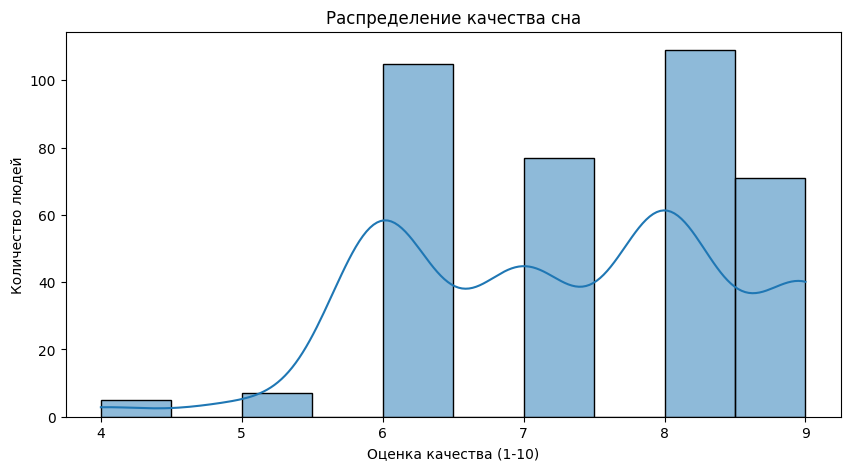

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Создаем график
plt.figure(figsize=(10, 5))
sns.histplot(df['Quality of Sleep'], bins=10, kde=True)
plt.title('Распределение качества сна')
plt.xlabel('Оценка качества (1-10)')
plt.ylabel('Количество людей')

# Сначала сохраняем, потом показываем
plt.savefig('sleep_quality_distribution.png', dpi=300, bbox_inches='tight')  # bbox_inches='tight' предотвращает обрезку
plt.show()  # Показываем график после сохранения

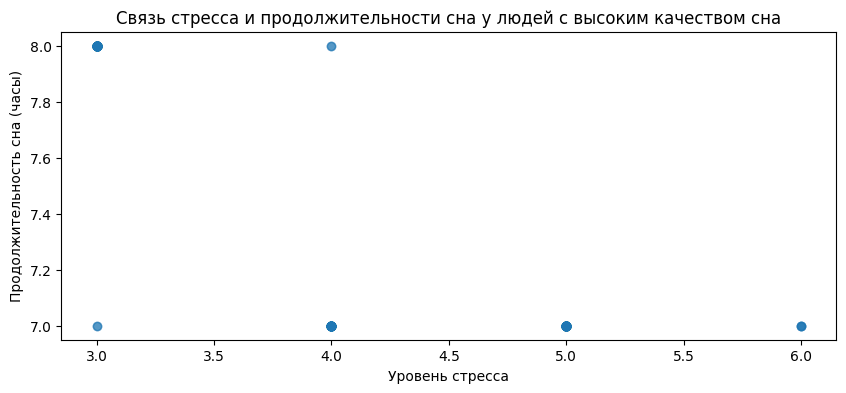

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.scatter(high_sleep_quality['Stress Level'], 
            high_sleep_quality['Sleep Duration'],
            alpha=0.5)
plt.title('Связь стресса и продолжительности сна у людей с высоким качеством сна')
plt.xlabel('Уровень стресса')
plt.ylabel('Продолжительность сна (часы)')
plt.savefig('Stress_Level_Sleep_Duration.png', dpi=300, bbox_inches='tight')
plt.show()

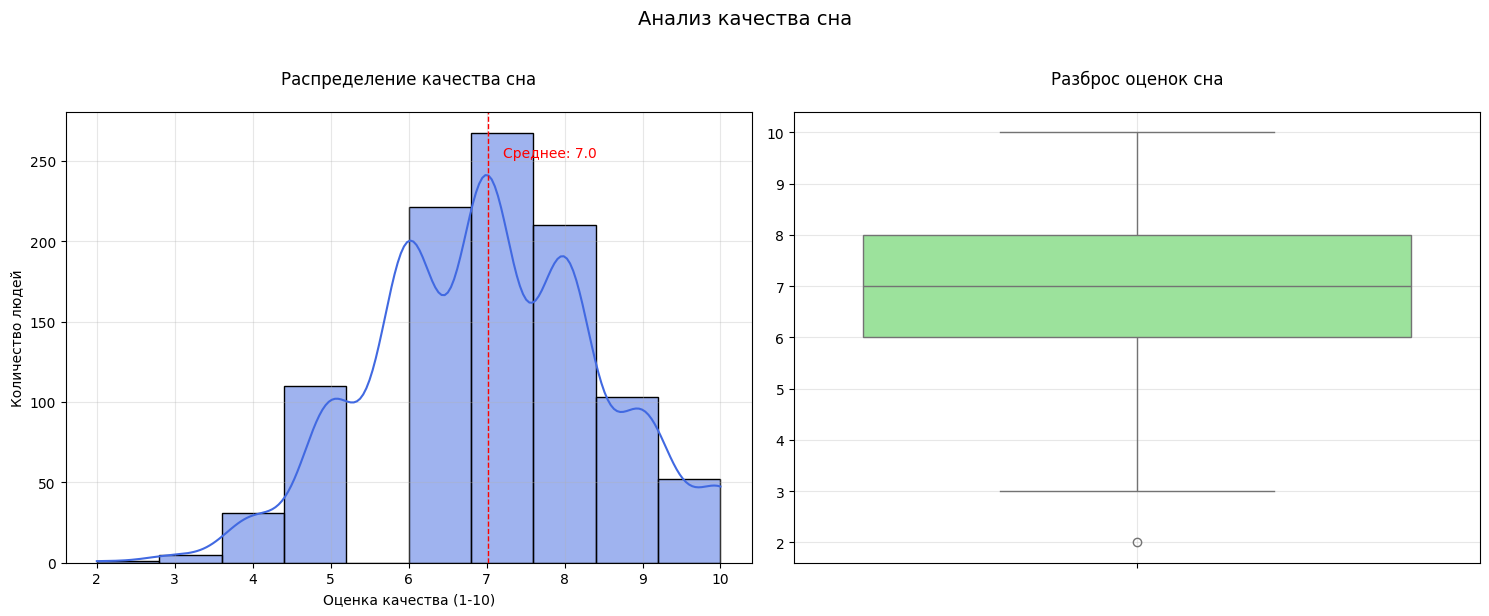

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Создаем тестовые данные, если у вас уже есть df - пропустите этот блок
np.random.seed(42)
data = {
    'Quality of Sleep': np.random.normal(loc=7, scale=1.5, size=1000).clip(1, 10),
    'Stress Level': np.random.randint(1, 10, size=1000)
}
df = pd.DataFrame(data)
df['Quality of Sleep'] = df['Quality of Sleep'].round().astype(int)

# Создаем фигуру с 2 подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма с KDE
sns.histplot(data=df, x='Quality of Sleep', bins=10, kde=True, ax=ax1, color='royalblue')
ax1.set_title('Распределение качества сна', pad=20)
ax1.set_xlabel('Оценка качества (1-10)')
ax1.set_ylabel('Количество людей')
ax1.grid(True, alpha=0.3)

# 2. Boxplot по качеству сна
sns.boxplot(y='Quality of Sleep', data=df, ax=ax2, color='lightgreen')
ax2.set_title('Разброс оценок сна', pad=20)
ax2.set_ylabel('')
ax2.grid(True, alpha=0.3)

# Добавляем аннотации
mean_val = df['Quality of Sleep'].mean()
ax1.axvline(mean_val, color='red', linestyle='--', linewidth=1)
ax1.text(mean_val+0.2, ax1.get_ylim()[1]*0.9, f'Среднее: {mean_val:.1f}', color='red')

# Настраиваем внешний вид
plt.suptitle('Анализ качества сна', y=1.02, fontsize=14)
plt.tight_layout()

# Сохраняем и показываем
plt.savefig('sleep_quality_analysis.png', dpi=300, bbox_inches='tight')
plt.show()